## 可视化内衣商品的销售特点

### 要求：分析商品特点；以可视化的方式表示；确定进货品类（颜色、尺码）

### 1.导入所需要的模块

In [29]:
import numpy as np    
import pandas as pd
import re    #正则化表达式
import seaborn as sns    #绘制图形
import matplotlib.pyplot as plt    #可视化软件
plt.style.use('fivethirtyeight')    # 设置绘图风格
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签

### 2.数据导入与预处理

#### 2.1 读取csv文件

利用pandas读取内衣店的两个csv文件，并查看该数据集的基本属性。

In [16]:
bra = pd.read_csv(r"F:\kaidian\bra.csv",encoding='gbk')    #导入数据，读取CSV数据
colors = pd.read_csv(r"F:\kaidian\colors.csv",encoding='gbk')

In [17]:
bra.info()    #查看数据属性
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15497 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   creationTime  15497 non-null  object
 1   productColor  15496 non-null  object
 2   productSize   15496 non-null  object
dtypes: object(3)
memory usage: 363.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  118 non-null    int64 
 1   0           117 non-null    object
 2   1           117 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
bra.head(10)    #查看前10行

,creationTime,productColor,productSize
0,2016/6/8 17:17,22咖啡色,75C
1,2017/4/7 19:34,22咖啡色,80B
2,2016/6/18 19:44,02粉色,80C
3,2017/8/3 20:39,22咖啡色,80B
4,2016/7/6 14:02,22咖啡色,75B
5,2017/3/18 11:49,22咖啡色,80B
6,2017/1/13 13:43,22咖啡色,80B
7,2016/7/10 22:22,22咖啡色,80B
8,2016/7/15 14:34,22咖啡色,80B
9,2017/3/27 12:54,22咖啡色,70C


In [7]:
bra.tail(10)    #打印最后10行

,creationTime,productColor,productSize
15487,2017/11/6 10:52,肤色,36B/80B
15488,2017/11/15 9:54,粉色,34A/75A
15489,2017/11/14 12:31,粉色,36B/80B
15490,2017/11/17 10:30,浅紫,34B/75B
15491,2017/11/17 10:30,肤色,34B/75B
15492,2017/10/28 22:39,粉色,38B/85B
15493,2017/11/11 0:13,粉色套装（含内裤）,36C/80C
15494,2017/11/1 14:41,黑色,34A/75A
15495,2017/10/31 18:40,粉色,34B/75B
15496,2017/11/7 18:38,黑色,36A/80A


In [18]:
colors.head(10)

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色
5,5,0993无痕肤色,肤色
6,6,0993无痕黑色,黑色
7,7,071红色,红色
8,8,0993无痕酒红色,红色
9,9,h03无痕蓝灰,蓝色


In [9]:
bra.dtypes      # 查看数据的类型

creationTime    object
productColor    object
productSize     object
dtype: object

#### 2.2查看缺失值

In [11]:
bra.isnull()   # 查看数据中的缺失值

,creationTime,productColor,productSize
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
15492,False,False,False
15493,False,False,False
15494,False,False,False
15495,False,False,False


#### 2.3颜色和尺码的类别总览

In [12]:
bra['productColor'].value_counts()    # 对产品颜色的种类进行汇总

肤色                 1582
粉色                 1252
黑色                 1181
香妃红                 984
玫瑰色                 935
                   ... 
虾粉                    1
爱心黑色                  1
醇黑                    1
天衣无缝 肤色【AB厚,C薄】       1
紫色套装（其他颜色备注）          1
Name: productColor, Length: 117, dtype: int64

In [13]:
bra['productSize'].value_counts()  # 对产品尺码的种类进行汇总

80B/36B          2580
75B=34B          1961
75B/34B          1338
75B              1125
34B/75B           888
                 ... 
85B+(内裤)套装          1
A70                 1
32B/70B             1
95E                 1
34/75c薄款0.8cm       1
Name: productSize, Length: 120, dtype: int64

#### 从内衣颜色和尺码的汇总结果可知，内衣颜色和尺码的种类记录非常混杂，难以进行可视化分析，所以需要对数据进行清洗整合，然后再进行后续分析。

### 3.清洗数据

#### 3.1清洗内衣颜色数据

颜色的统一整合
对比购买的内衣颜色情况和产品的颜色表进行比较，
发现bra文件中的内衣颜色过杂，可以利用colors文件中参照表重新进行分类
例如bra数据中的蓝灰色、深蓝色等颜色都归为蓝色一类，创建一个新的颜色列

In [19]:
# 创建一个字典，将colors的第0列作为字典的键，第1列作为字典的值
keys = colors['0']
values = colors['1']
colors_new_dict = dict(zip(keys, values))    # 用zip整合并创建字典
colors_new_dict

{'22咖啡色': '棕色',
 '02粉色': '粉色',
 '071蓝色': '蓝色',
 '071黑色': '黑色',
 '071肤色': '肤色',
 '0993无痕肤色': '肤色',
 '0993无痕黑色': '黑色',
 '071红色': '红色',
 '0993无痕酒红色': '红色',
 'h03无痕蓝灰': '蓝色',
 '蓝灰色': '蓝色',
 '酒红色': '红色',
 '内裤酒红色': '红色',
 '内裤蓝灰色': '蓝色',
 nan: nan,
 '肤色': '肤色',
 '藕荷色': '粉色',
 '藕荷色(套装)': '粉色',
 '玫瑰色': '红色',
 '深蓝色': '蓝色',
 '烟灰紫': '紫色',
 '天蓝色': '蓝色',
 '黑色': '黑色',
 '红色': '红色',
 '香妃红': '红色',
 '杏肤色': '肤色',
 '诱惑黑': '黑色',
 '土豪金': '黄色',
 '大红': '红色',
 '嫣紫': '紫色',
 '皇家蓝': '蓝色',
 '粉晶色': '粉色',
 '柔肤色': '肤色',
 '蓝灰': '蓝色',
 '大红色': '红色',
 '紫色无钢圈厚杯': '紫色',
 '肤色无钢圈厚杯': '肤色',
 '黑色无钢圈厚杯': '黑色',
 '紫色套装': '紫色',
 '爱心大红色': '红色',
 '肤色套装': '肤色',
 '爱心肤色': '肤色',
 '爱心黑色': '黑色',
 '紫色 单件': '紫色',
 '紫色 套装': '紫色',
 '肤色 单件': '肤色',
 '黑色 单价': '黑色',
 '肤色 套装': '肤色',
 '黑色 套装': '黑色',
 '浅紫色': '紫色',
 '内裤黑色': '黑色',
 '内裤肤色': '肤色',
 '浅蓝': '蓝色',
 '浅黄': '黄色',
 '宝蓝色': '蓝色',
 '酒红': '红色',
 '灰色': '灰色',
 '浅粉色': '粉色',
 '醇黑': '黑色',
 '红条纹': '红色',
 '蓝色': '蓝色',
 '蓝条纹': '蓝色',
 'PNK': '粉色',
 'LAV': '紫色',
 'BLK': '黑色',
 'GRN': '绿色',
 '浅紫色  ': '紫色',
 '肤色

In [20]:
# 在bra数据集中添加一列，作为新的颜色类
bra.insert(2, 'productColor_new','')   # 插入一个新的颜色列
for i in range(len(bra['productColor'])):     # 遍历原来的颜色列，找到字典中对应的新颜色，并加入到新的列中
    bra['productColor_new'][i] = colors_new_dict.get(bra['productColor'][i])
bra.head()

# 方法二：用pd.merge合并两个数据集
#pd.merge(bra, colors, left_on='productColor', right_on=0)

,creationTime,productColor,productColor_new,productSize
0,2016/6/8 17:17,22咖啡色,棕色,75C
1,2017/4/7 19:34,22咖啡色,棕色,80B
2,2016/6/18 19:44,02粉色,粉色,80C
3,2017/8/3 20:39,22咖啡色,棕色,80B
4,2016/7/6 14:02,22咖啡色,棕色,75B


In [21]:
bra = bra.dropna()    # 整合完新颜色后，对数据集过滤缺失值（查找到一个缺失值并删除）
bra

,creationTime,productColor,productColor_new,productSize
0,2016/6/8 17:17,22咖啡色,棕色,75C
1,2017/4/7 19:34,22咖啡色,棕色,80B
2,2016/6/18 19:44,02粉色,粉色,80C
3,2017/8/3 20:39,22咖啡色,棕色,80B
4,2016/7/6 14:02,22咖啡色,棕色,75B
...,...,...,...,...
15492,2017/10/28 22:39,粉色,粉色,38B/85B
15493,2017/11/11 0:13,粉色套装（含内裤）,粉色,36C/80C
15494,2017/11/1 14:41,黑色,黑色,34A/75A
15495,2017/10/31 18:40,粉色,粉色,34B/75B


#### 3.2 清洗内衣尺码数据

由于bra数据集中的尺码记录十分杂乱，有些只记录国际尺码，有些记录了英式尺码和国际尺码，还有一些还记录了S/M/L尺码，记录形式十分繁多，而且还存在一部分产品不是内衣产品，所以在整合的时候不清洗这部分产品。所以需要将内衣的尺码统一整合为同一种尺码（这里使用国际尺码），比如75B，80C等等，以便后续进行可视化分析。
首先采用正则化的方式创建一些通式，把尺码中的国际尺码提取出来，进行整合汇总；
然后将尺码中的小写字母转换成大写字母，所有的尺码格式统一为国际尺码；
最后只剩下内衣的国际尺码和部分内裤尺码的数据，将内裤尺码简化，然后再进行后续可视化分析。

In [23]:
# 利用正则表达式把一些特殊形式的尺码都改成国际尺码
pattern1 = r'[7-9]\d[A-Z]'
regex1 = re.compile(pattern1, flags=re.IGNORECASE)
pattern2 = r'[A-Z][7-9]\d'
regex2 = re.compile(pattern2, flags=re.IGNORECASE) 
pattern3 = r'\d{2}/\d{2}[A-Z]'
regex3 = re.compile(pattern3, flags=re.IGNORECASE) 

for i in range(len(bra)+1):
    try:
        re_size1 = regex1.findall(bra['productSize'][i])
        re_size2 = regex2.findall(bra['productSize'][i])
        re_size3 = regex3.findall(bra['productSize'][i])
        if re_size1:
            bra['productSize'][i] = max(re_size1)
        if re_size2:
            bra['productSize'][i] = bra['productSize'][i][1:] + bra['productSize'][i][0]
        if re_size3:
            bra['productSize'][i] = max(re.compile(r'\d{2}').findall(bra['productSize'][i])) + bra['productSize'][i][-1]
        else:
            continue
    except:
        continue
# bra

In [24]:
# 把小写字母替换成大写字母
for i in range(len(bra)+1):
    try:
        bra['productSize'][i] = str(bra['productSize'][i]).upper()
    except:
        continue
# bra

### 4. 内衣销量的统计

#### 4.1 分析内衣颜色销量

In [25]:
# 统计各种颜色的内衣数量
color = bra['productColor_new'].astype('category')   # 将颜色转化为类别型
col = color.value_counts()    # 对各颜色类别进行计数
col

蓝色    3423
红色    2715
紫色    2505
肤色    2169
黑色    2142
粉色    2000
黄色     268
灰色     126
绿色      97
棕色      51
Name: productColor_new, dtype: int64

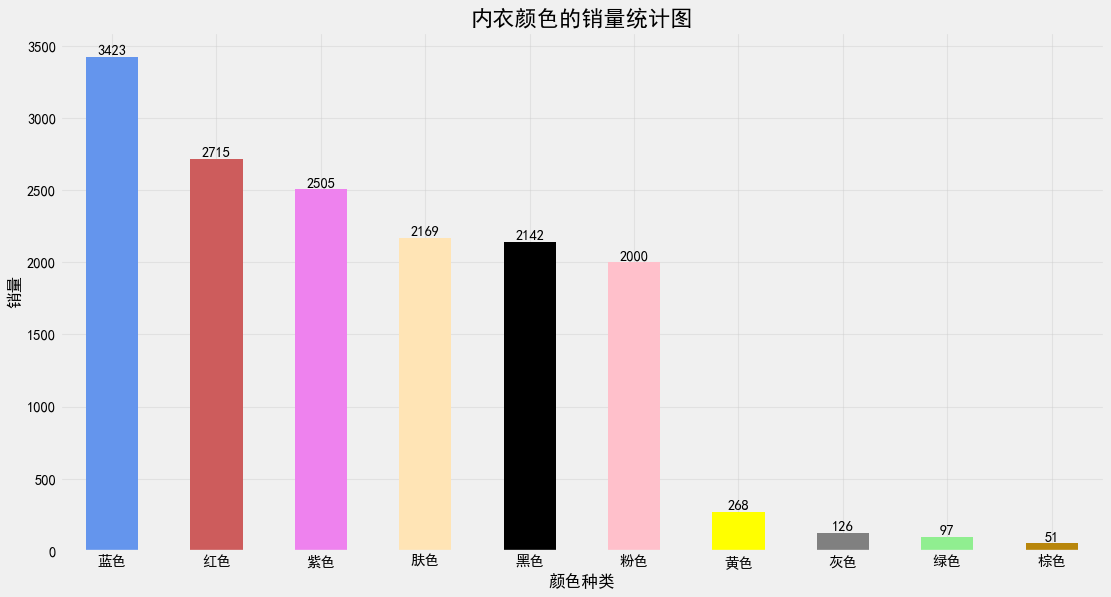

In [26]:
# 绘制内衣颜色销量的柱状图
plt.figure(figsize=(15,8),dpi=80)
col.plot.bar(color = ['cornflowerblue','indianred','violet','moccasin','black','pink','yellow','gray','lightgreen','darkgoldenrod'])
plt.tick_params(axis='both',which='major',rotation=0, labelsize=14)
# 设置横纵坐标的名称和字体大小
plt.xlabel("颜色种类",size = 15)
plt.ylabel("销量",size = 15)
plt.title("内衣颜色的销量统计图",size = 20)
# 设置坐标轴字体大小
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# 绘制网格
plt.grid(alpha=0.4)
# 添加数据标签
for i,__ in enumerate(col.values.tolist()):
    plt.text(i,__+0.05, '%.0f' % __, ha='center', va= 'bottom',fontsize=13)

plt.show()

In [27]:
col_ = col.rename_axis('颜色种类').reset_index(name='销量')   # 将数据转换成DataFrame格式
print(col_)

  颜色种类    销量
0   蓝色  3423
1   红色  2715
2   紫色  2505
3   肤色  2169
4   黑色  2142
5   粉色  2000
6   黄色   268
7   灰色   126
8   绿色    97
9   棕色    51


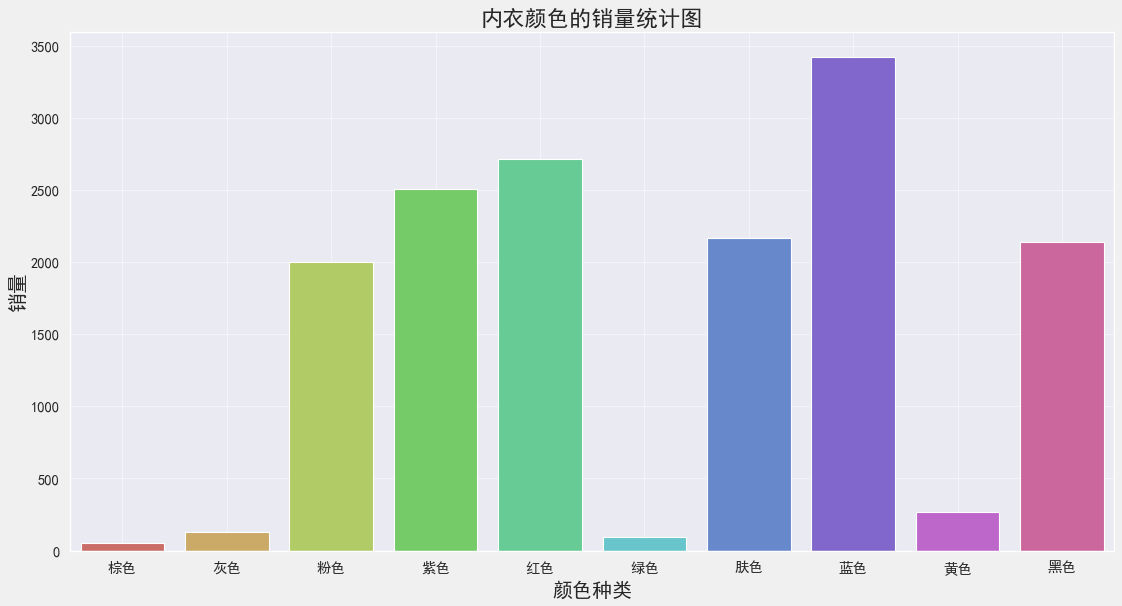

In [30]:
# 利用seaborn绘制图形
plt.figure(figsize=(15,8),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')            # 解决Seaborn中文显示问题
pal = sns.color_palette("hls", 10)       # 使用seaborn调色板
sns.barplot(x='颜色种类', y='销量', data=col_, palette=pal)   # 绘制条形图
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('颜色种类', size=18)
plt.ylabel('销量', size=18)
plt.title('内衣颜色的销量统计图', size=20)
plt.grid(alpha=0.5)
plt.show()

分析：对内衣颜色进行统计并绘制条形图，内衣的颜色销量从大到小分别为：蓝色、红色、紫色、肤色、黑色、粉色、黄色、灰色、绿色、棕色，前面六种颜色的内衣销量较好，所以可以多进一些货，尤其是蓝色内衣的销量遥遥领先，可以加大蓝色内衣的进货量。而后四位颜色的内衣销量比较少，但也有部分人购买，所以还是需要备货，但是货量可以少一些。

#### 4.2 分析内衣尺码销量

In [31]:
# 统计尺码
size = bra['productSize'].astype('category')   # 将颜色转化为类别型
size_num = size.value_counts()
size_num

75B          6954
80B          3968
85B           998
80C           581
75A           488
70B           459
75D           360
75C           357
80A           270
85C           259
70A           171
165/76/L      152
160/70/M      113
85A           100
170/82/XL      75
90C            39
70C            27
90D            21
85D            20
90B            20
80D            18
85E            17
80E             8
75E             5
95D             4
90A             4
95C             4
90E             3
95E             1
Name: productSize, dtype: int64

In [32]:
size_num_ = size_num.rename_axis('尺码大小').reset_index(name='销量')   # 将数据转换成DataFrame格式
print(size_num_)

         尺码大小    销量
0         75B  6954
1         80B  3968
2         85B   998
3         80C   581
4         75A   488
5         70B   459
6         75D   360
7         75C   357
8         80A   270
9         85C   259
10        70A   171
11   165/76/L   152
12   160/70/M   113
13        85A   100
14  170/82/XL    75
15        90C    39
16        70C    27
17        90D    21
18        85D    20
19        90B    20
20        80D    18
21        85E    17
22        80E     8
23        75E     5
24        95D     4
25        90A     4
26        95C     4
27        90E     3
28        95E     1


In [33]:
# 把内裤的数据提取出来
data_size1 = size_num_.iloc[[11,12,14]]   # iloc直接可以用整数索引
data_size1

,尺码大小,销量
11,165/76/L,152
12,160/70/M,113
14,170/82/XL,75


<Figure size 960x480 with 0 Axes>

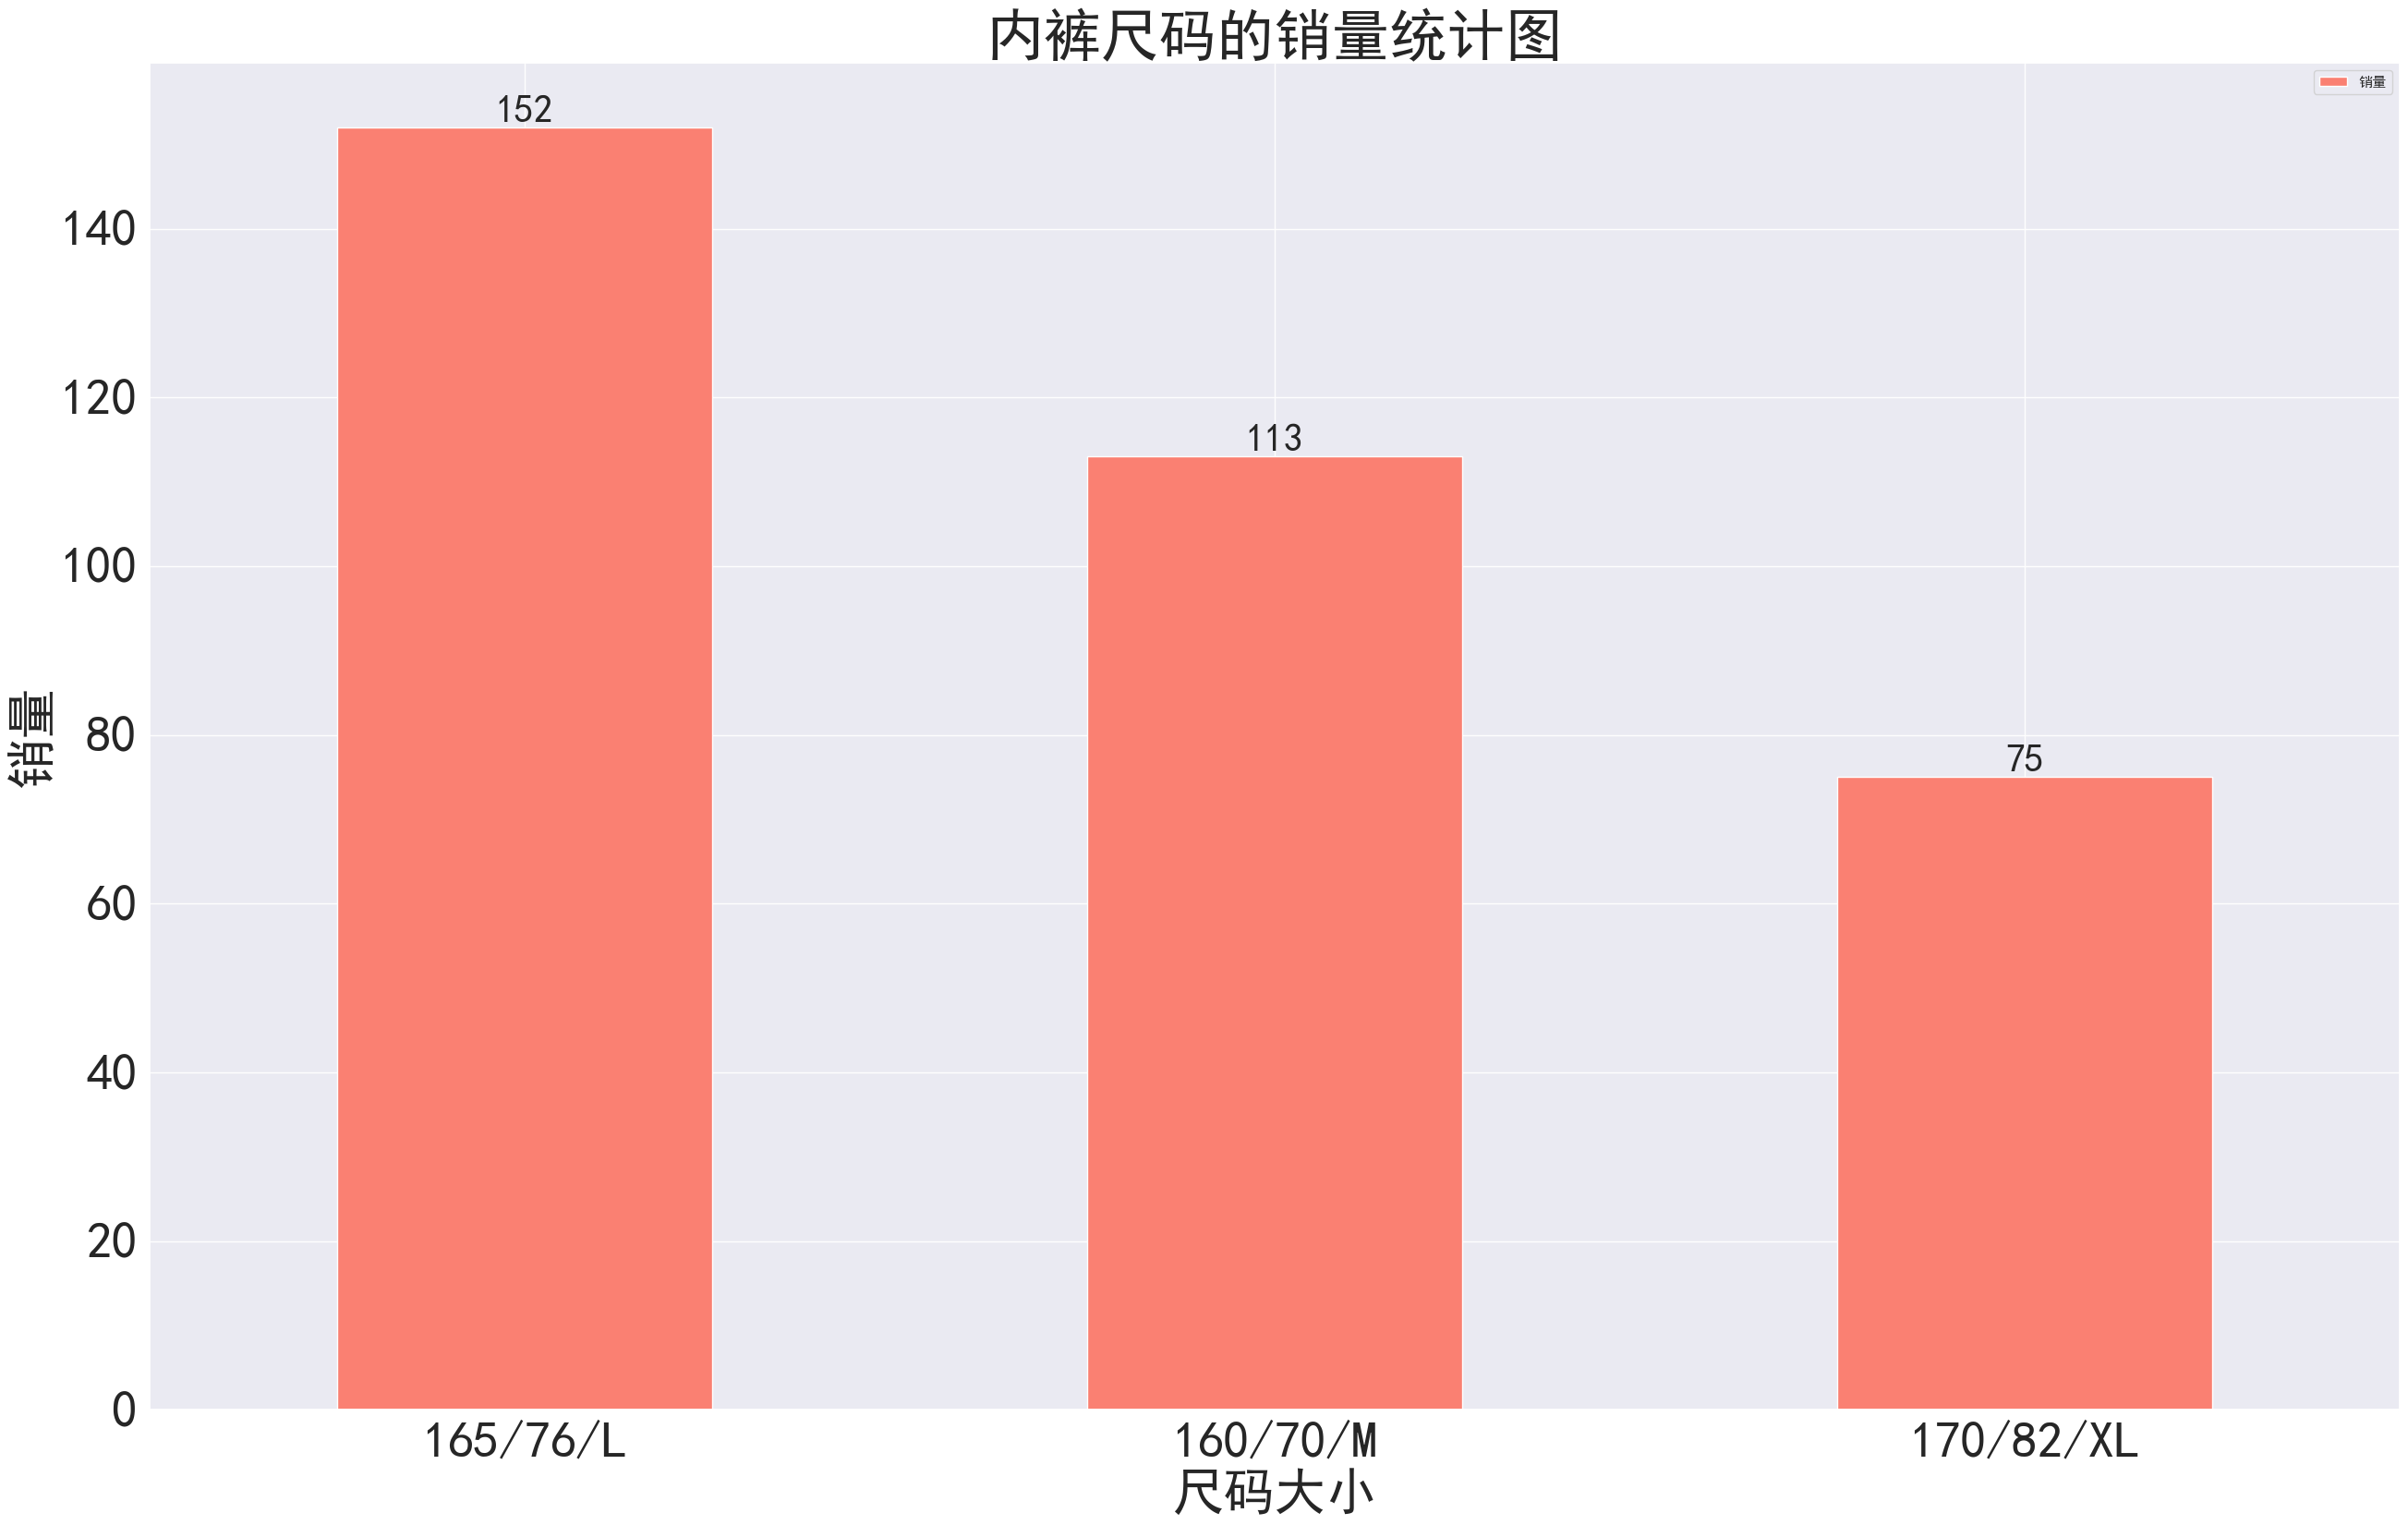

In [49]:
# 绘制内裤尺码的销量统计图
plt.figure(figsize=(12,6),dpi=80)
plt.rcParams['savefig.dpi'] = 100 # 图片像素
plt.rcParams['figure.dpi'] = 100 # 分辨率
data_size1.plot.bar(x='尺码大小', y='销量', color = 'salmon')
# 设置坐标
plt.tick_params(axis='both',which='major',rotation=0, labelsize=40)
# 设置横纵坐标及题目名称
plt.xlabel("尺码大小",size = 40)
plt.ylabel("销量",size = 40)
plt.title("内裤尺码的销量统计图",size = 45)
# 绘制网格
plt.grid(alpha=5)
# 添加数据标签
for i,__ in enumerate(data_size1['销量'].tolist()):
    plt.text(i,__+0.05, '%.0f' % __, ha='center', va= 'bottom',fontsize=30)
plt.show()

分析：上图是内裤尺码销售量的统计图，其中销量最高的是165/76/L，其次是160/70/M，最后是170/82/XL，所以可以多储备一些L码的内裤，其次是M码，XL码最少，可以少进一些货。

In [42]:
# 把内衣数据提取出来
data_size2 = size_num_.drop([11,12,14])
data_size2

,尺码大小,销量
0,75B,6954
1,80B,3968
2,85B,998
3,80C,581
4,75A,488
5,70B,459
6,75D,360
7,75C,357
8,80A,270
9,85C,259


<Figure size 1200x640 with 0 Axes>

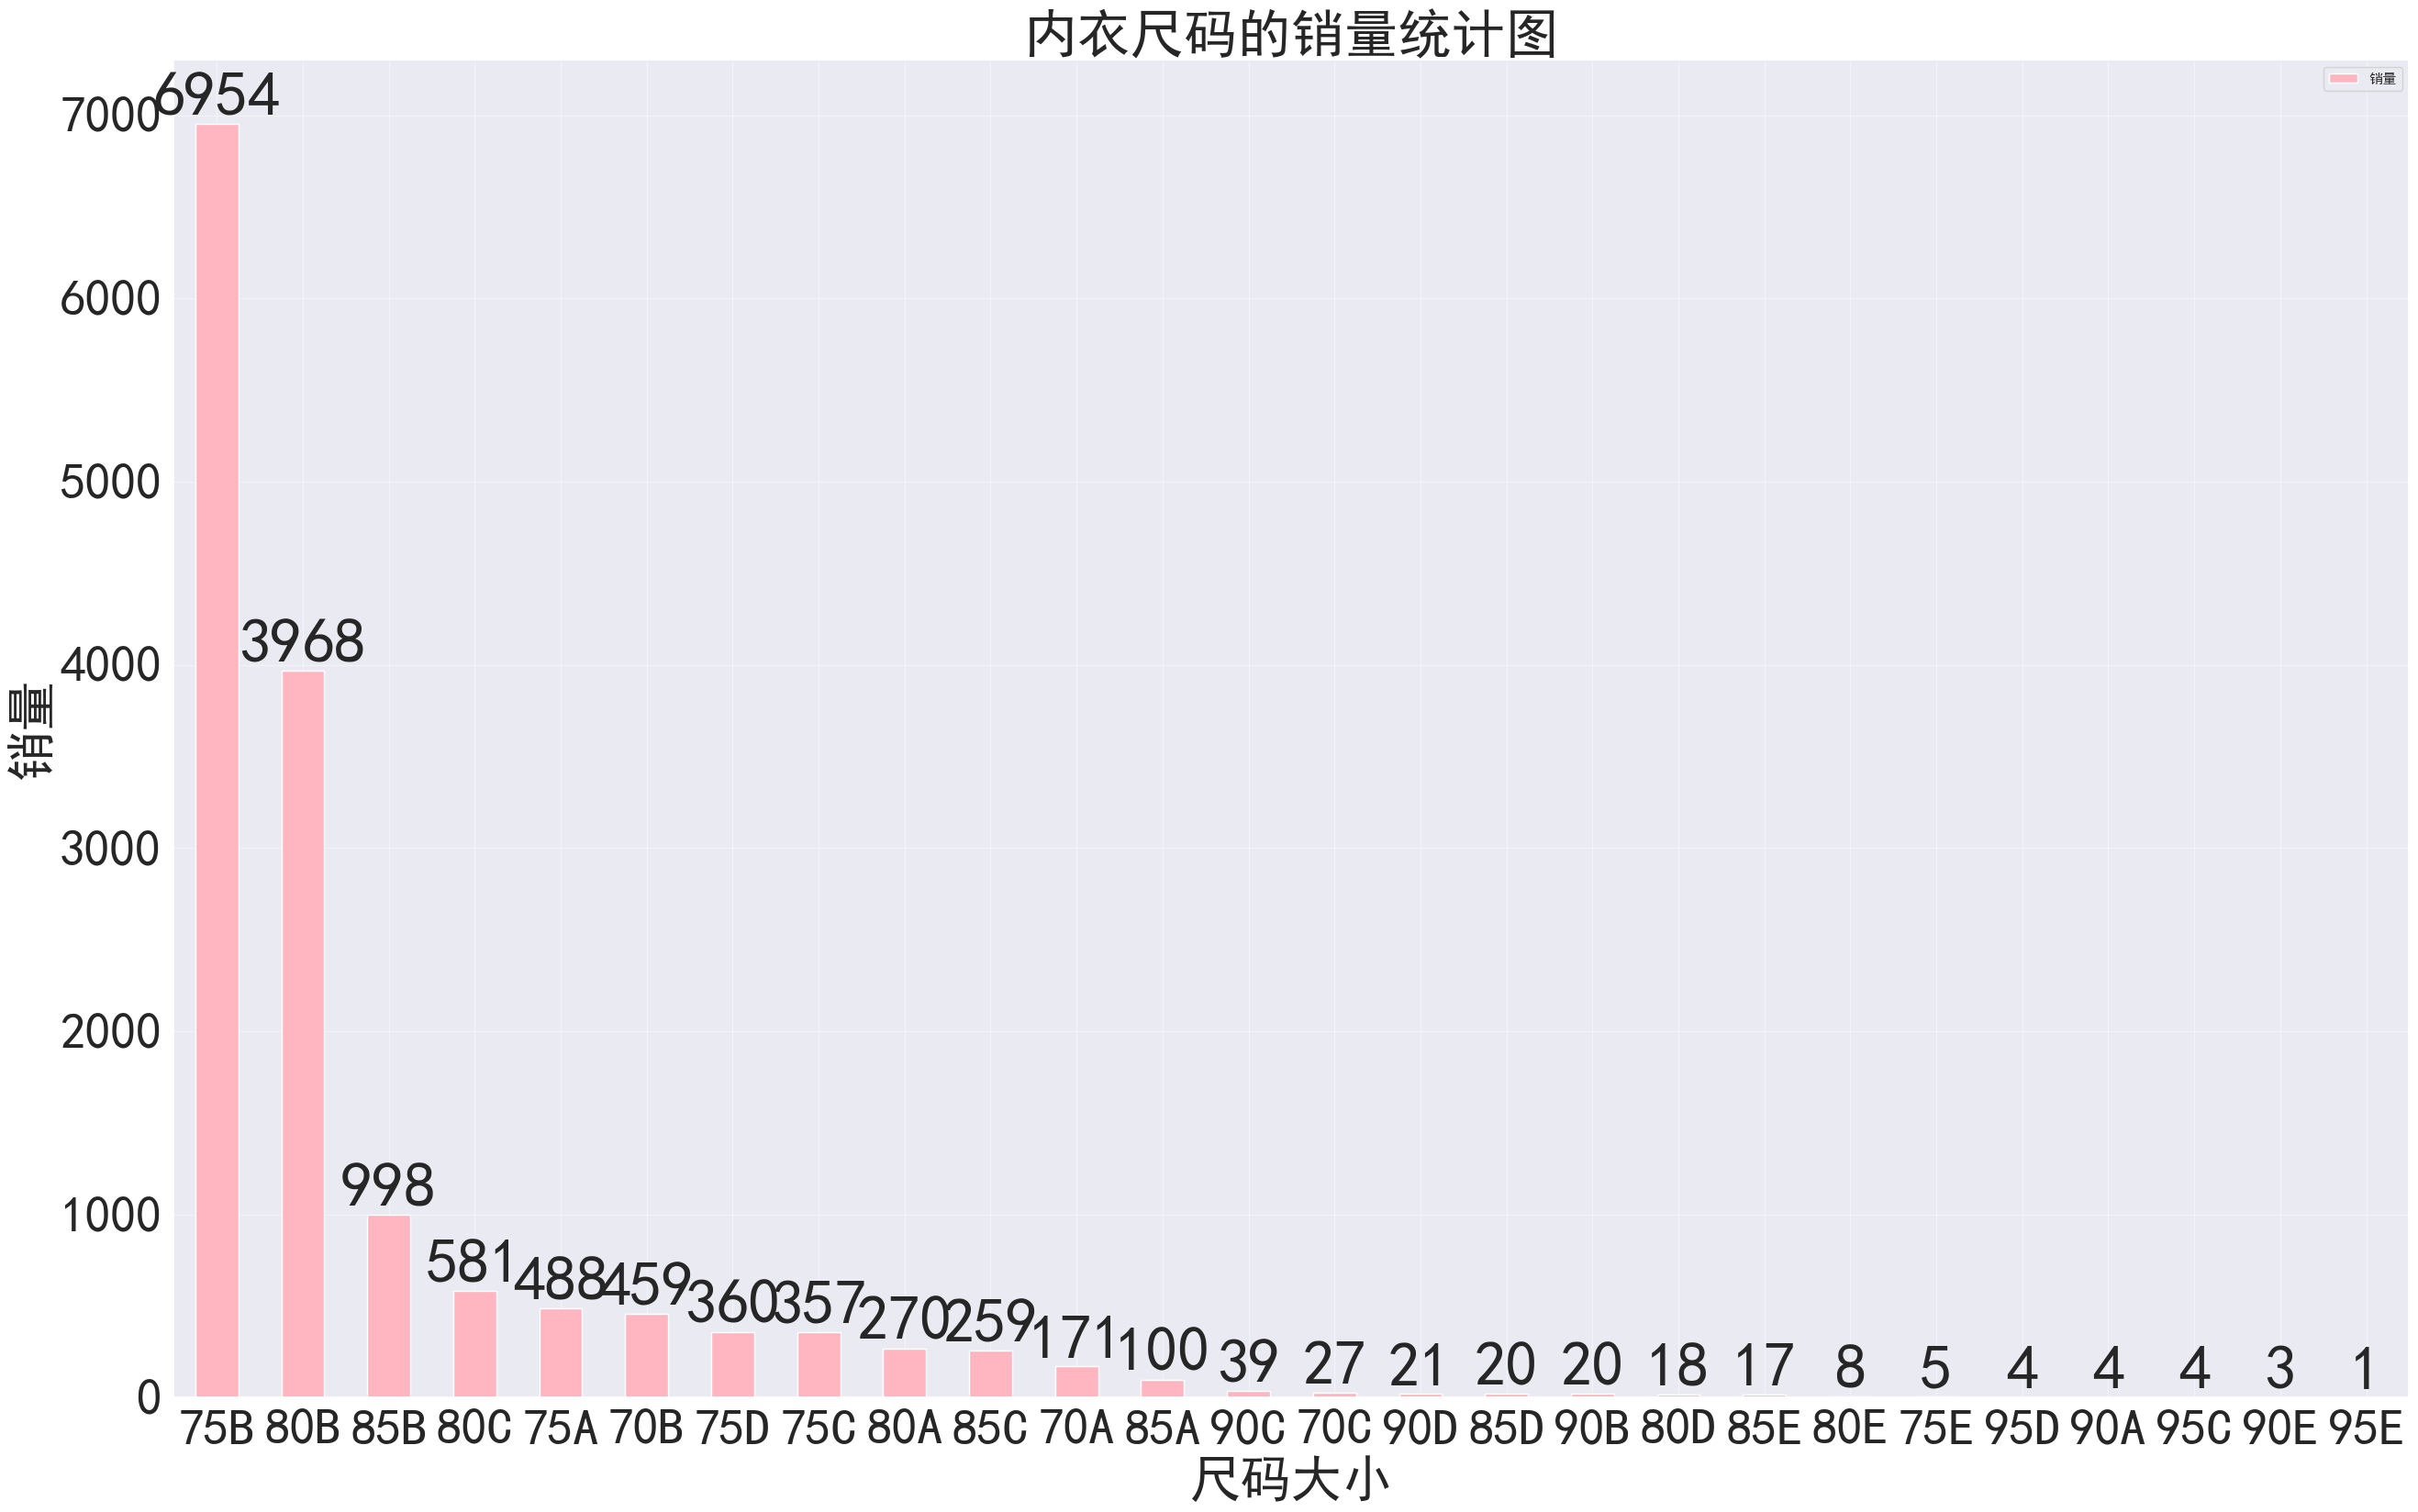

In [48]:
# 绘制内衣尺码的销量统计图
plt.figure(figsize=(15,8),dpi=80)
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
data_size2.plot.bar(x='尺码大小', y='销量', color = 'lightpink')
# 设置坐标
plt.tick_params(axis='both',which='major',rotation=0, labelsize=40)
# 设置横纵坐标及题目名称
plt.xlabel("尺码大小",size = 40)
plt.ylabel("销量",size =40)
plt.title("内衣尺码的销量统计图",size = 42)
# 绘制网格
plt.grid(alpha=0.4)
# 添加数据标签
for i,__ in enumerate(data_size2['销量'].tolist()):
    plt.text(i,__+0.05, '%.0f' % __, ha='center', va= 'bottom',fontsize=40)
plt.show()

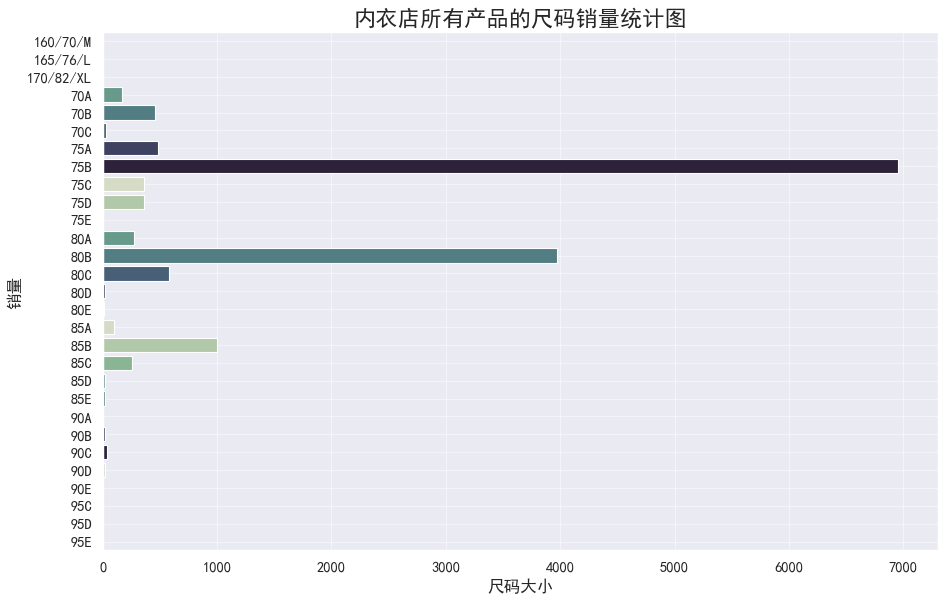

In [50]:
# 利用seaborn绘制内衣店所有产品的销量图
plt.figure(figsize=(12,8),dpi=80)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')            # 解决Seaborn中文显示问题
pal = sns.cubehelix_palette(8,start=.5,rot=-.75)     # 使用调色板
sns.barplot(x='销量', y='尺码大小', data = data_size2, palette=pal)   # 绘制条形图
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('尺码大小', size=15)
plt.ylabel('销量', size=15)
plt.title('内衣店所有产品的尺码销量统计图', size=20)
plt.grid(alpha=0.5)
plt.show()

分析：对内衣尺码进行清洗处理，将尺码都改成国际尺码，然后进行统计绘图，可以发现内衣尺码最多的是75B，并且销量优势明显，其次是80B。而有一些尺码的销量非常少，特别是一些比较大的尺码很少有人购买，所以在进货的时候要多进一些75B、80B的内衣，而销量超过100的内衣也要按照平时的销量进货，而一些较少见的尺码可以少进一些，避免货物堆积。

### 5.内衣销量分析

#### 5.1 从时间角度进行分析

5.1.1 时间数据的转化和提取

In [52]:
#首先将时间数据转化为datetime类型
#以便后续将年份和月份从该列中提取出来
from datetime import datetime
bra['creationTime']=pd.to_datetime(bra['creationTime'])
bra

,creationTime,productColor,productColor_new,productSize
0,2016-06-08 17:17:00,22咖啡色,棕色,75C
1,2017-04-07 19:34:00,22咖啡色,棕色,80B
2,2016-06-18 19:44:00,02粉色,粉色,80C
3,2017-08-03 20:39:00,22咖啡色,棕色,80B
4,2016-07-06 14:02:00,22咖啡色,棕色,75B
...,...,...,...,...
15492,2017-10-28 22:39:00,粉色,粉色,85B
15493,2017-11-11 00:13:00,粉色套装（含内裤）,粉色,80C
15494,2017-11-01 14:41:00,黑色,黑色,75A
15495,2017-10-31 18:40:00,粉色,粉色,75B


In [53]:
# 提取年份数据和月份数据
bra['year'] = bra['creationTime'].dt.year 
bra['month'] = bra['creationTime'].dt.month
bra

,creationTime,productColor,productColor_new,productSize,year,month
0,2016-06-08 17:17:00,22咖啡色,棕色,75C,2016,6
1,2017-04-07 19:34:00,22咖啡色,棕色,80B,2017,4
2,2016-06-18 19:44:00,02粉色,粉色,80C,2016,6
3,2017-08-03 20:39:00,22咖啡色,棕色,80B,2017,8
4,2016-07-06 14:02:00,22咖啡色,棕色,75B,2016,7
...,...,...,...,...,...,...
15492,2017-10-28 22:39:00,粉色,粉色,85B,2017,10
15493,2017-11-11 00:13:00,粉色套装（含内裤）,粉色,80C,2017,11
15494,2017-11-01 14:41:00,黑色,黑色,75A,2017,11
15495,2017-10-31 18:40:00,粉色,粉色,75B,2017,10


5.1.2 按年分析内衣店销量情况

In [55]:
year_num = bra['year'].value_counts()    # 统计不同年份的内衣销量数据
year_num = year_num.rename_axis('年份').reset_index(name='销量')
year_num

,年份,销量
0,2017,13880
1,2016,1614
2,2015,1
3,2014,1


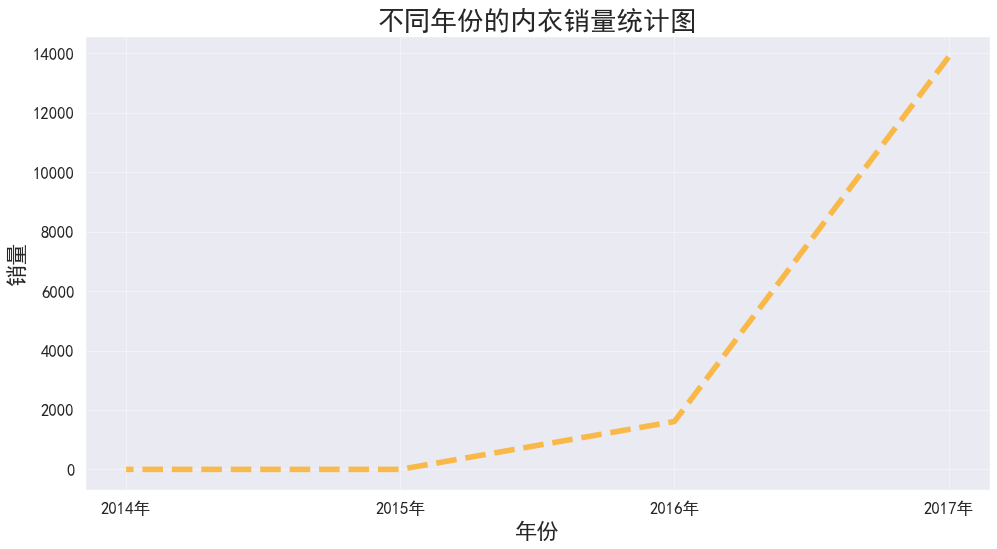

In [56]:
#设置图形大小
plt.figure(figsize=(13,7),dpi=80)
x = year_num['年份']
y = year_num['销量']
plt.plot(x, y, color = "orange", linestyle='--', linewidth=5, alpha=0.7)
#设置x轴刻度
_xtick_labels = ["{}年".format(i) for i in x]
plt.xticks(year_num['年份'],_xtick_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("年份", size=20)
plt.ylabel("销量", size=20)
plt.title("不同年份的内衣销量统计图", size=24)
#绘制网格 
plt.grid(alpha=0.4)
plt.show()

5.1.3 按月分析内衣店销量情况

In [57]:
month_num = bra['month'].value_counts()    # 统计不同月份的内衣销量数据
month_num = month_num.rename_axis('月份').reset_index(name='销量')
month_num

,月份,销量
0,10,3831
1,11,3569
2,9,1728
3,6,1217
4,8,1075
5,7,916
6,5,806
7,3,671
8,4,658
9,12,495


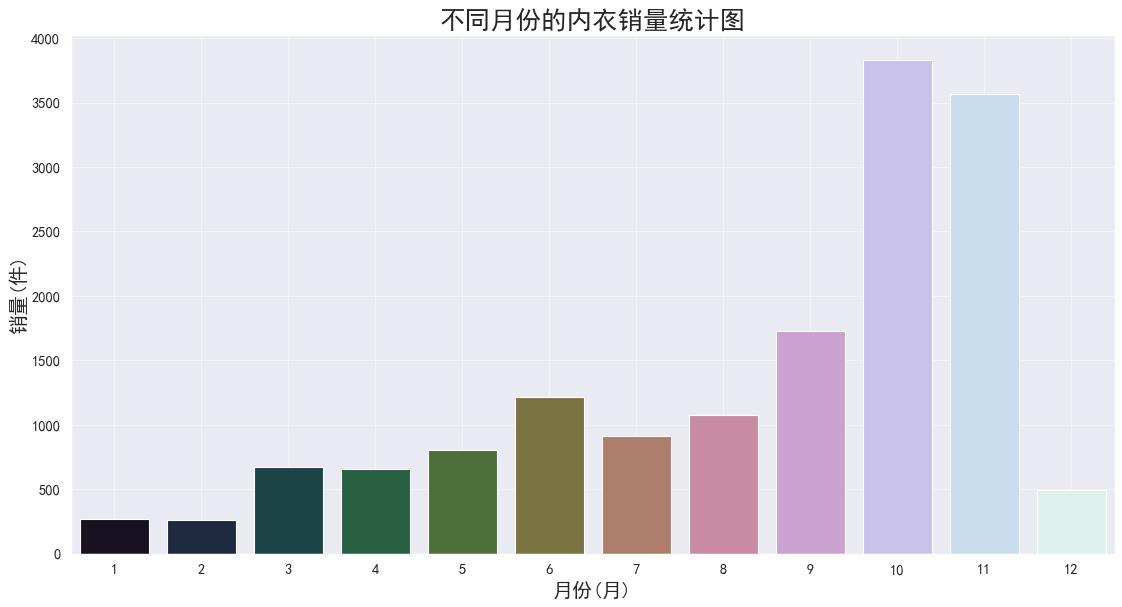

In [58]:
# 利用seaborn绘制不同月份的内衣销量图
plt.figure(figsize=(15,8),dpi=80)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')            # 解决Seaborn中文显示问题
pal = sns.color_palette("cubehelix",12)           # 使用调色板
x = month_num['月份']
y = month_num['销量']
sns.barplot(x, y, palette=pal)   # 绘制条形图
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('月份(月)', size=18)
plt.ylabel('销量(件)', size=18)
plt.title('不同月份的内衣销量统计图', size=23)
plt.grid(alpha=0.5)
plt.show()

分析：将内衣店的销量按照年份和月份进行汇总，发现2014年和2015年的销量只有1件，说明这两年的数据记录较少，或者是店铺刚起步，销量较低，到了2016年销量上涨到1614件，到2017年销量急剧上涨，一共有13880件，说明内衣店的销量是比较可观的，一直在不断上涨，未来的市场前景是光明的。

再将数据按照月份进行统计汇总，发现内衣销量最高的月份是在10月和11月，1月和2月较少，一般淘宝店铺在10月、11月的促销比较多，促进消费。所以商家可以根据不同月份的销量情况进货，可以减少不必要的供应不足和货品堆积情况。